In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing


In [196]:
df_de_state =pd.read_excel('data_for_modeling.xlsx',sheet_name='sheet1')
df_de_it =pd.read_excel('data_for_modeling.xlsx',sheet_name='sheet2')
df_de =pd.read_excel('data.xlsx',sheet_name='sheet1',index_col=0)

In [197]:
df_de_state.head()

,State,Year,Emission in metric tons
0,AK,2020,227011.06
1,AL,2020,428724.98
2,AR,2020,332116.35
3,AZ,2020,487898.79
4,CA,2020,240849.09


In [198]:
df_de_it.head()

,IT_sectors,Year,Emission in metric tons
0,Chemicals,2020,318311.27
1,"Chemicals,Coal-based Liquid Fuel Supply,Suppli...",2020,3230507.30
2,"Chemicals,Industrial Gas Suppliers",2020,281269.82
3,"Chemicals,Industrial Gas Suppliers,Minerals",2020,49540.27
4,"Chemicals,Industrial Gas Suppliers,Waste",2020,32761.46


In [199]:
df_de.describe()

,FRS_Id,Zip Code,Latitude,Longitude,Primary_NAICS_Code,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
count,6.405000e+03,6515.000000,6515.000000,6515.000000,6515.000000,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03
mean,1.100244e+11,53978.809977,37.315360,-92.479267,364410.079202,3.684321e+05,4.064988e+05,4.352801e+05,4.314888e+05,4.474238e+05,4.672780e+05,4.916863e+05,5.002783e+05,5.076397e+05,5.340269e+05
std,2.408523e+07,27107.727878,5.978644,16.760792,143584.980862,1.064542e+06,1.180335e+06,1.277499e+06,1.275032e+06,1.279495e+06,1.316998e+06,1.429759e+06,1.435176e+06,1.397826e+06,1.496368e+06
min,1.100003e+11,0.000000,13.394900,-174.113611,111419.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.196250e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100015e+11,32213.000000,32.904403,-97.801833,221112.000000,3.126729e+04,3.493267e+04,3.614736e+04,3.647170e+04,3.726029e+04,3.940339e+04,4.050051e+04,4.278497e+04,4.553063e+04,4.799812e+04
50%,1.100144e+11,55024.000000,37.785556,-90.212800,325199.000000,6.320322e+04,7.040830e+04,7.578675e+04,7.687800e+04,8.123944e+04,8.508808e+04,8.793460e+04,9.453331e+04,1.052225e+05,1.128387e+05
75%,1.100438e+11,77488.000000,41.242651,-82.604299,486210.000000,1.794937e+05,2.156112e+05,2.668058e+05,2.984203e+05,3.633972e+05,4.422575e+05,4.916863e+05,5.002783e+05,5.076397e+05,5.340269e+05
max,1.100711e+11,99801.000000,71.292071,144.891130,928110.000000,1.723290e+07,1.916974e+07,1.842964e+07,2.079817e+07,1.973314e+07,1.924705e+07,2.048246e+07,2.229333e+07,2.181556e+07,2.207365e+07


In [200]:
df_de.columns

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011'],
      dtype='object')

In [201]:
df_de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6515 entries, 1004377 to 1011696
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FRS_Id              6405 non-null   float64
 1   Facility_Name       6515 non-null   object 
 2   City                6515 non-null   object 
 3   State               6515 non-null   object 
 4   Zip Code            6515 non-null   int64  
 5   Address             6038 non-null   object 
 6   County              6261 non-null   object 
 7   Latitude            6515 non-null   float64
 8   Longitude           6515 non-null   float64
 9   Primary_NAICS_Code  6515 non-null   int64  
 10  IT_subparts         6515 non-null   object 
 11  IT_sectors          6515 non-null   object 
 12  2020                6515 non-null   float64
 13  2019                6515 non-null   float64
 14  2018                6515 non-null   float64
 15  2017                6515 non-null   float64
 1

# Dropping the column with null values

In [202]:
df_de.drop(['FRS_Id'], axis=1, inplace=True)

In [203]:
#correlation between the chosen features
df_de.corr()

,Zip Code,Latitude,Longitude,Primary_NAICS_Code,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
Zip Code,1.000000,-0.063065,-0.693603,-0.028343,0.017572,0.016953,0.012113,0.008991,0.002575,0.006953,0.006618,0.010419,0.007045,0.001032
Latitude,-0.063065,1.000000,-0.148892,0.040426,-0.039519,-0.033699,-0.031186,-0.029003,-0.033302,-0.031521,-0.030702,-0.028785,-0.034494,-0.035901
Longitude,-0.693603,-0.148892,1.000000,0.040631,0.009452,0.009275,0.013322,0.014740,0.018683,0.015669,0.019521,0.015349,0.018387,0.022843
Primary_NAICS_Code,-0.028343,0.040426,0.040631,1.000000,-0.226516,-0.225320,-0.222622,-0.216491,-0.224069,-0.226700,-0.220020,-0.218490,-0.221687,-0.214428
2020,0.017572,-0.039519,0.009452,-0.226516,1.000000,0.973522,0.953903,0.941323,0.924452,0.909017,0.878707,0.877565,0.861165,0.845639
2019,0.016953,-0.033699,0.009275,-0.225320,0.973522,1.000000,0.980539,0.967608,0.954231,0.941964,0.921308,0.917964,0.902315,0.887277
2018,0.012113,-0.031186,0.013322,-0.222622,0.953903,0.980539,1.000000,0.984697,0.973432,0.958177,0.946340,0.942540,0.928244,0.918990
2017,0.008991,-0.029003,0.014740,-0.216491,0.941323,0.967608,0.984697,1.000000,0.983437,0.966489,0.955018,0.950880,0.934545,0.928184
2016,0.002575,-0.033302,0.018683,-0.224069,0.924452,0.954231,0.973432,0.983437,1.000000,0.982693,0.970035,0.962705,0.953791,0.942199
2015,0.006953,-0.031521,0.015669,-0.226700,0.909017,0.941964,0.958177,0.966489,0.982693,1.000000,0.982281,0.977157,0.967508,0.955439


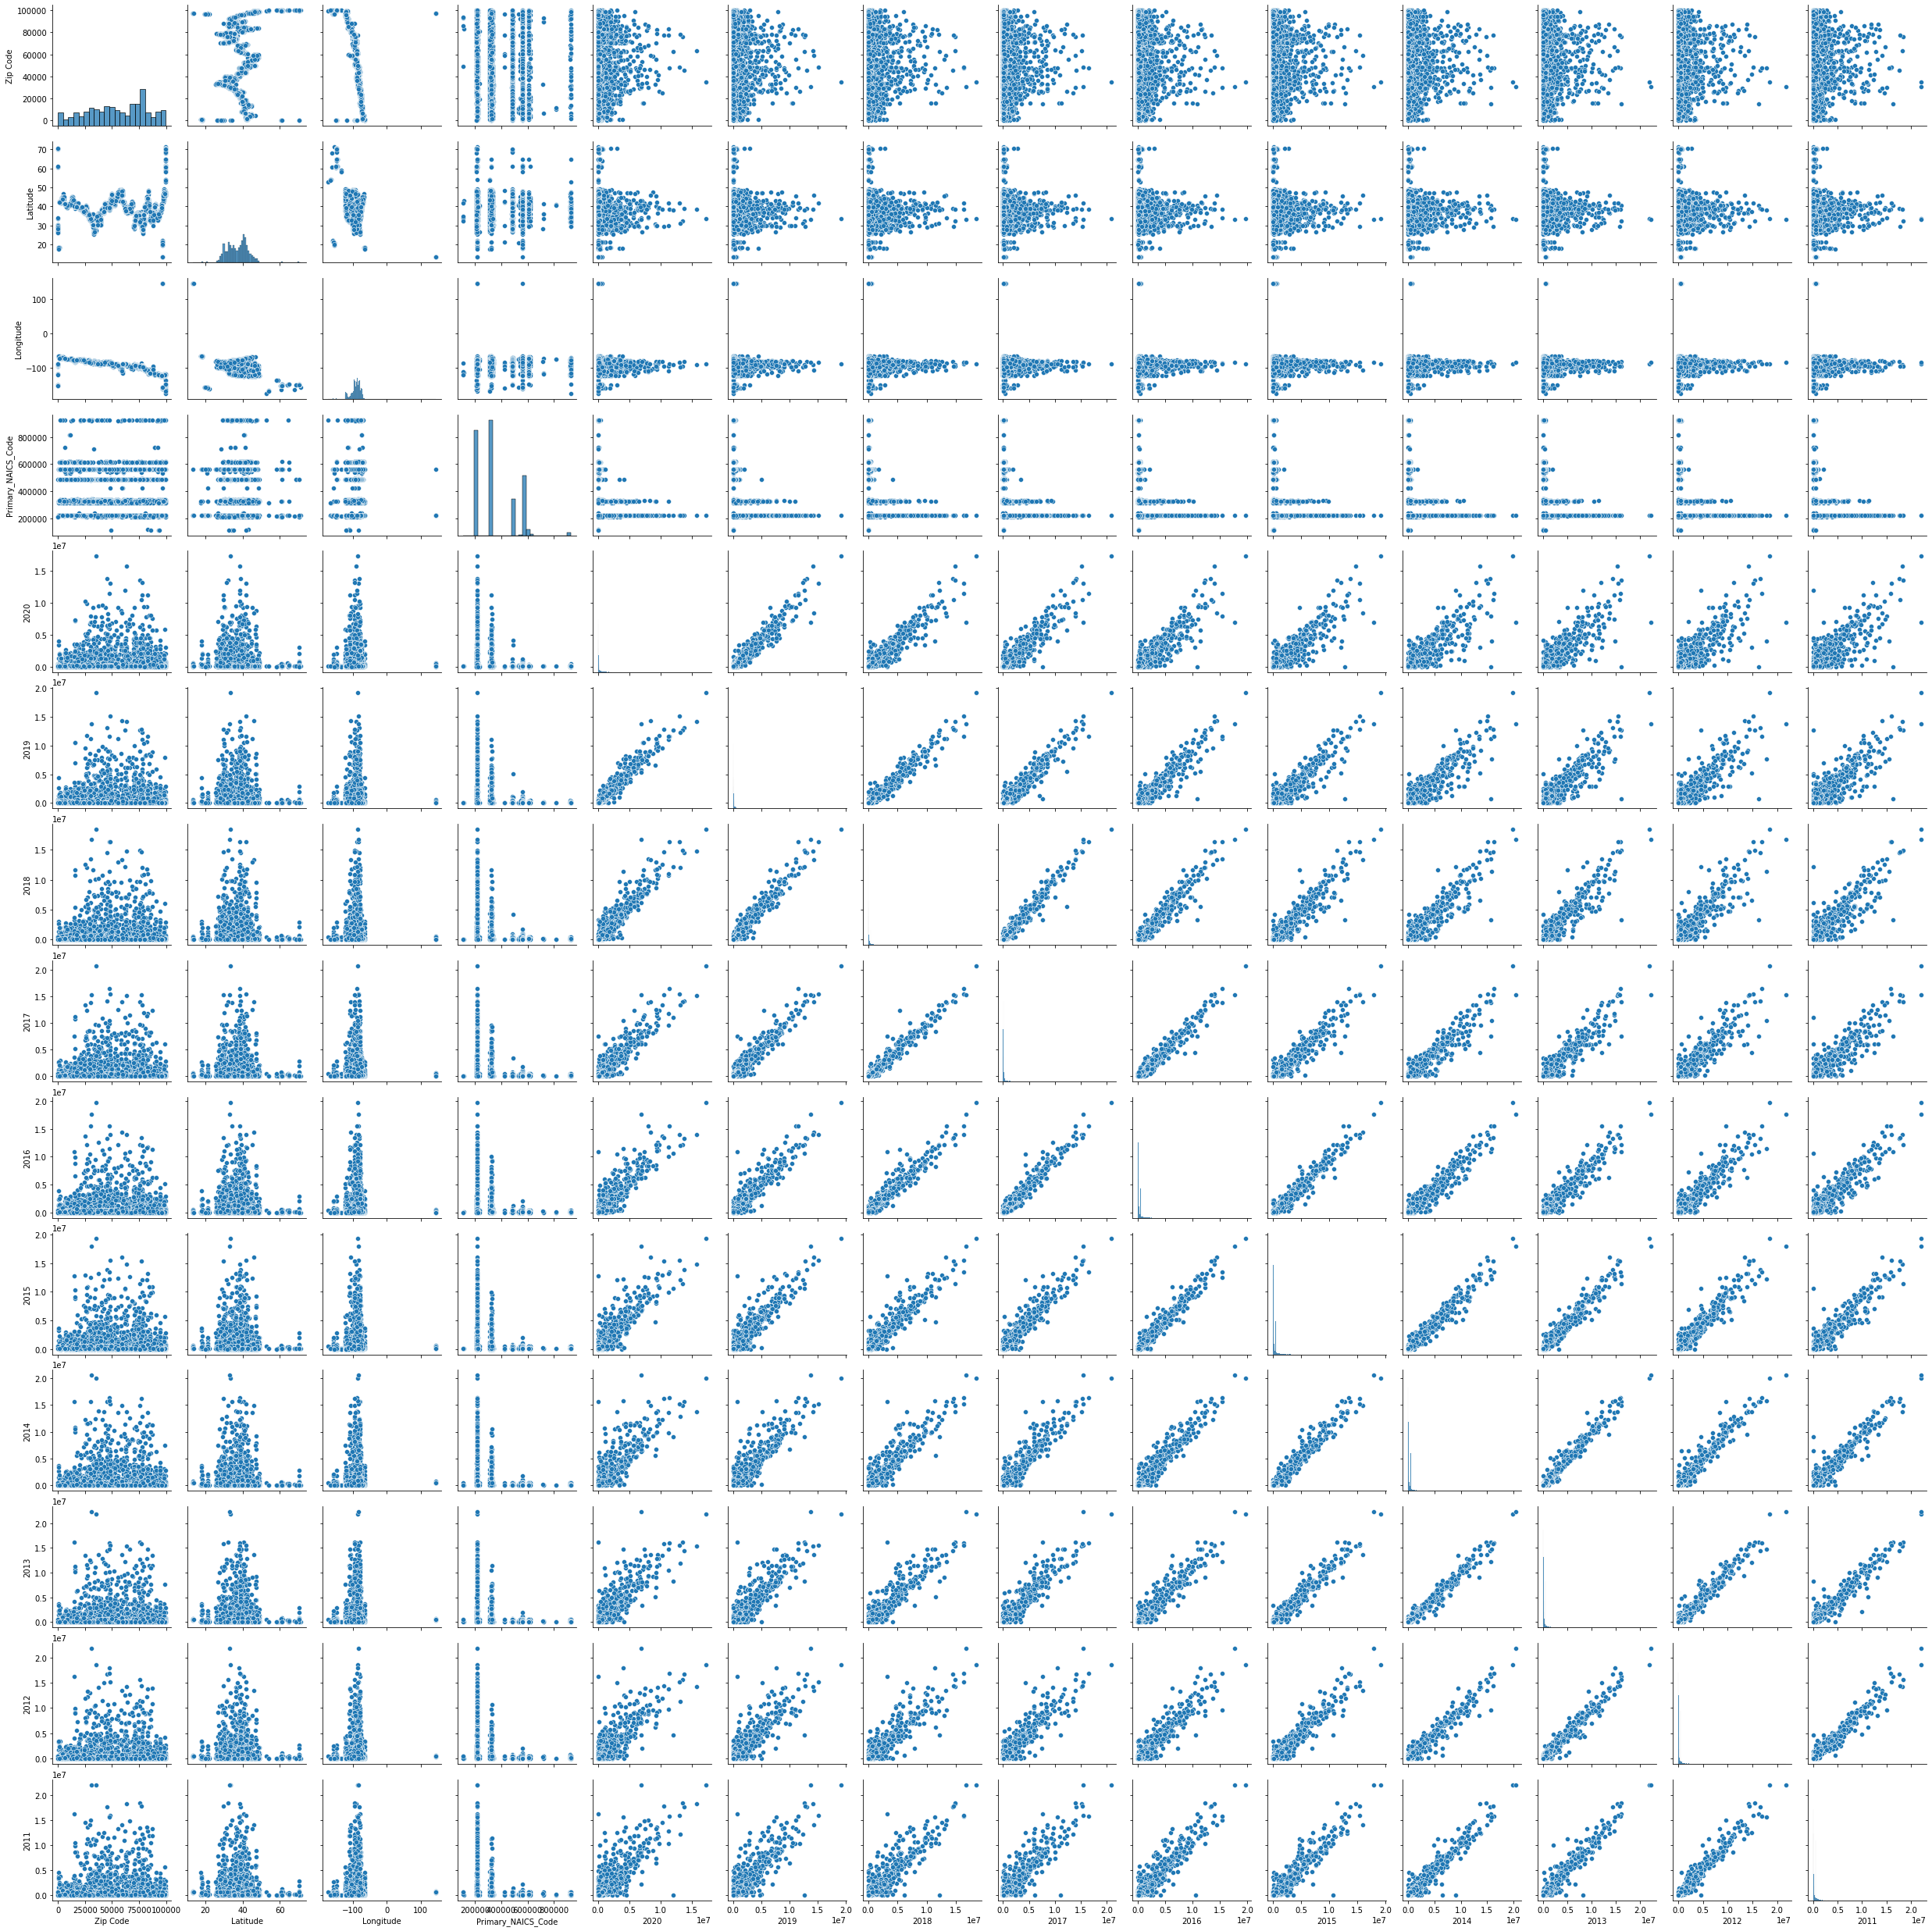

In [204]:
sns.pairplot(df_de)

<AxesSubplot:>

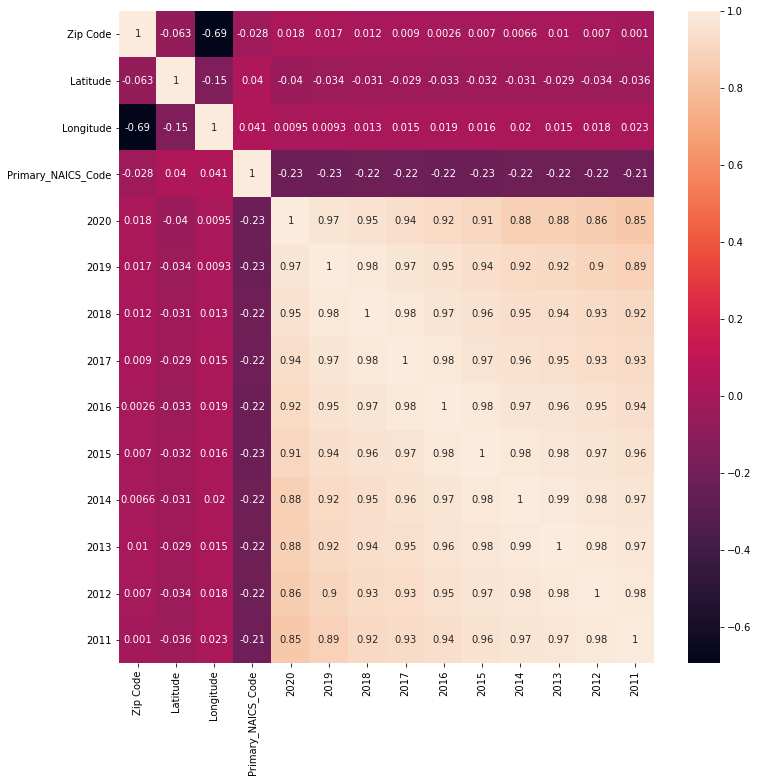

In [205]:
plt.figure(figsize=(12,12))
sns.heatmap(df_de.corr(),annot=True)

# correlation between the emission data for the year 2019 and 2020

<AxesSubplot:xlabel='2019', ylabel='2020'>

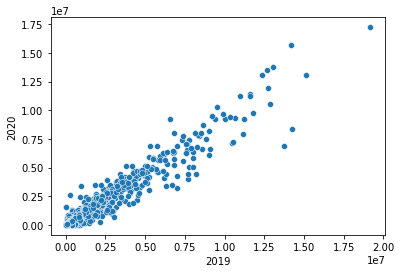

In [206]:
sns.scatterplot(x=df_de['2019'],y=df_de['2020'])

<AxesSubplot:xlabel='2019', ylabel='2020'>

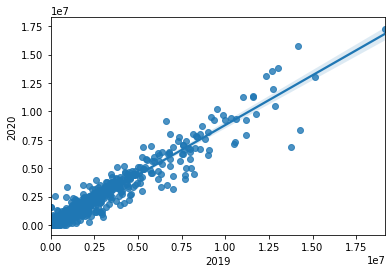

In [207]:
sns.regplot(x=df_de['2019'],y=df_de['2020'],data='df_de')

There is a significant correlation between the emissions in the year 2019 and 2020.

# First Linear Regression model with just the Latitude and the Longitute features

In [208]:
X = df_de.drop(['2020','Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County','Primary_NAICS_Code', 'IT_subparts', 'IT_sectors','Primary_NAICS_Code'],axis = 1)
y = df_de[['2020']]
X

,Latitude,Longitude,2019,2018,2017,2016,2015,2014,2013,2012,2011
Facility Id,,,,,,,,,,,
1004377,33.298570,-96.535860,518680.250,653854.000000,250497.500000,221014.750000,199011.750000,241883.500000,289953.250000,204000.000000,194000.000000
1000112,40.663000,-74.000000,44658.384,70705.288000,52698.656000,66797.352000,67399.252000,40722.200000,102599.220000,68984.744000,100591.828000
1013621,32.540693,-103.522351,38691.478,435280.099943,431488.809907,447423.757318,467277.995747,491686.293592,500278.254166,507639.706331,534026.861412
1003742,41.835129,-87.915924,18925.400,31220.150000,29026.800000,120657.600000,92696.600000,120707.350000,97467.500000,87357.750000,95113.250000
1003188,31.671177,-98.996513,30571.636,34432.420000,36202.264000,31773.480000,36754.712000,36419.864000,34821.820000,33671.924000,37149.360000
...,...,...,...,...,...,...,...,...,...,...,...
1010592,31.795396,-94.179048,44919.946,30924.146000,11961.956000,447423.757318,1386.044000,3437.688000,10141.238000,32744.948000,534026.861412
1000805,42.477600,-87.895000,395152.486,321472.988000,271470.880000,261586.278000,82924.594000,41118.262000,70492.840000,78032.512000,66811.452000
1001464,39.736900,-105.016900,10870.860,16707.788000,14363.196000,19363.428000,23648.012000,23916.312000,31493.184000,28339.044000,31193.236000


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [210]:
rModel = linear_model.LinearRegression(normalize=True)

In [211]:
rmodel_results = rModel.fit(X_train,y_train)

LinearRegression(normalize=True)

In [212]:
print(rModel.score(X_train,y_train))

0.954945478229788


In [213]:
y_pred= rModel.predict(X_test)

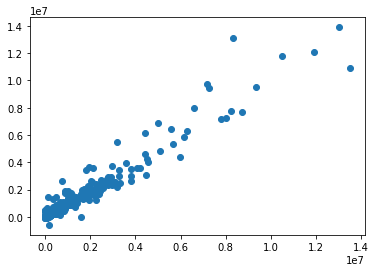

In [214]:
plt.scatter(y_test,y_pred)

# Linear regression model with lesser feature variables using OLS

In [323]:
X=df_de[['Latitude','Longitude','2016','2017','2018','2019']]
X=sm.add_constant(X)
y = df_de[['2020']]

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [325]:
rModel2 = sm.OLS(y_train, X_train)

In [326]:
rModel2_results = rModel2.fit()

In [327]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:26:48   Log-Likelihood:                -67346.
No. Observations:                4886   AIC:                         1.347e+05
Df Residuals:                    4879   BIC:                         1.348e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.855e+04   2.59e+04      2.258      0.024    7722.077    1.09e+05
Latitude    -946.5362    565.861     -1.673      0.094   -2055.878     162.805
Longitude    124.2792    198.096      0.627      0.530    -264.079     512.637
2016          -0.1384      0.014     -9.601      0.000      -0.167      -0.110
2017           0.1896      0.019      9.966      0.000       0.152       0.227
2018          -0.0624      0.019     -3.259      0.001      -0.100      -0.025
2019           0.9056      0.014     63.770      0.000       0.878       0.933
==============================================================================
Omnibus:                     2707.738   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1724055.090
Skew:                          -1.260   Prob(JB):                         0.00
Kurtosis:                      94.990   Cond. No.                     2.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [328]:
y_pred = rModel2_results.predict(X_test)


ValueError: continuous is not supported

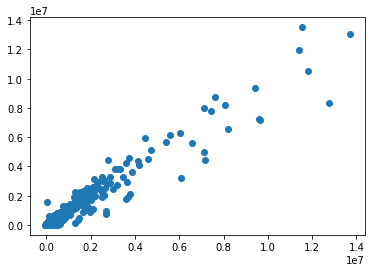

In [329]:
plt.scatter(y_pred, y_test)


# First dropped the target column and then one-hot encoding applied on States

In [222]:
X= df_de_state_0.drop('Emission in metric tons', axis =1)
X = pd.get_dummies(X)
X=sm.add_constant(X)


In [223]:
y= df_de_state_0[['Emission in metric tons']]

In [224]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)

In [225]:
rModel_d1_e2 = sm.OLS(y_train, X_train)
rModel_d1_e2_results = rModel_d1_e2.fit()
rModel_d1_e2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Emission in metric tons   R-squared:                       0.959
Model:                                 OLS   Adj. R-squared:                  0.952
Method:                      Least Squares   F-statistic:                     149.8
Date:                     Mon, 07 Feb 2022   Prob (F-statistic):          1.50e-210
Time:                             09:44:23   Log-Likelihood:                -4857.0
No. Observations:                      405   AIC:                             9824.
Df Residuals:                          350   BIC:                         1.004e+04
Df Model:                               54                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.302e+07   1.48e+06     22.242      0.000    3.01e+07    3.59e+07
Year       -1.648e+04    750.292    -21.960      0.000    -1.8e+04    -1.5e+04
State_AK     4.44e+05   3.07e+04     14.448      0.000    3.84e+05    5.04e+05
State_AL    7.241e+05   3.17e+04     22.872      0.000    6.62e+05    7.86e+05
State_AR    6.519e+05   3.14e+04     20.774      0.000     5.9e+05    7.14e+05
State_AZ    6.958e+05   3.13e+04     22.227      0.000    6.34e+05    7.57e+05
State_CA    4.622e+05   3.11e+04     14.883      0.000    4.01e+05    5.23e+05
State_CO    6.407e+05   3.05e+04     20.984      0.000    5.81e+05    7.01e+05
State_CT    4.306e+05   3.19e+04     13.483      0.000    3.68e+05    4.93e+05
State_DC    3.343e+05   3.19e+04     10.475      0.000    2.72e+05    3.97e+05
State_DE    6.338e+05    3.2e+04     19.785      0.000    5.71e+05    6.97e+05
State_FL    9.269e+05   3.07e+04     30.236      0.000    8.67e+05    9.87e+05
State_GA    6.391e+05    3.1e+04     20.646      0.000    5.78e+05       7e+05
State_GU    4.872e+05    3.1e+04     15.741      0.000    4.26e+05    5.48e+05
State_HI    5.001e+05   3.18e+04     15.724      0.000    4.38e+05    5.63e+05
State_IA    5.476e+05    3.1e+04     17.690      0.000    4.87e+05    6.08e+05
State_ID    3.414e+05    3.1e+04     11.020      0.000     2.8e+05    4.02e+05
State_IL    6.202e+05   3.05e+04     20.313      0.000     5.6e+05     6.8e+05
State_IN    9.414e+05   3.11e+04     30.312      0.000     8.8e+05       1e+06
State_KS    5.847e+05    3.1e+04     18.891      0.000    5.24e+05    6.46e+05
State_KY     9.28e+05   3.06e+04     30.281      0.000    8.68e+05    9.88e+05
State_LA    5.848e+05   3.07e+04     19.029      0.000    5.24e+05    6.45e+05
State_MA    3.592e+05   3.07e+04     11.690      0.000    2.99e+05     4.2e+05
State_MD    5.712e+05   3.15e+04     18.149      0.000    5.09e+05    6.33e+05
State_ME    3.938e+05   3.19e+04     12.339      0.000    3.31e+05    4.57e+05
State_MI    5.919e+05   3.15e+04     18.807      0.000     5.3e+05    6.54e+05
State_MN    5.186e+05    3.2e+04     16.196      0.000    4.56e+05    5.82e+05
State_MO    9.594e+05    3.2e+04     29.961      0.000    8.96e+05    1.02e+06
State_MS    6.019e+05   3.17e+04     18.974      0.000    5.39e+05    6.64e+05
State_MT    9.235e+05   3.07e+04     30.053      0.000    8.63e+05    9.84e+05
State_NC    6.998e+05   3.11e+04     22.499      0.000    6.39e+05    7.61e+05
State_ND    8.646e+05   3.13e+04     27.633      0.000    8.03e+05    9.26e+05
State_NE    6.368e+05   3.29e+04     19.371      0.000    5.72e+05    7.01e+05
State_NH    3.893e+05   3.31e+04     11.765      0.000    3.24e+05    4.54e+05
State_NJ    4.748e+05   3.14e+04     15.129      0.000    4.13e+05    5.36e+05
State_NM    6.705e+05   3.

In [226]:
y_pred = rModel_d1_e2_results.predict(X_test)

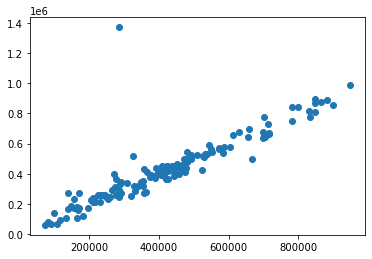

In [227]:
plt.scatter(x=y_pred,y= y_test)


# one-hot encoded on IT_sectors and then the target column dropped

In [262]:
#X_it = pd.get_dummies(X_it)
#X_it= df_de_it.drop('Emission in metric tons', axis =1)

encoded = pd.get_dummies(df_de_it['IT_sectors'])
X_it = df_de_it.join(encoded).drop('IT_sectors', axis = 1)

print(X_it.shape,encoded.shape)

(620, 64) (620, 62)


In [263]:
X_it= X_it.drop('Emission in metric tons', axis =1)
X_it = sm.add_constant(X_it)

y_it= df_de_it[['Emission in metric tons']]
X_train, X_test, y_train, y_test=train_test_split(X_it, y_it, test_size = 0.25, random_state = 246)

rModel2_it = sm.OLS(y_train, X_train)
rModel2_it_results = rModel2_it.fit()
rModel2_it_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Emission in metric tons   R-squared:                       0.976
Model:                                 OLS   Adj. R-squared:                  0.972
Method:                      Least Squares   F-statistic:                     265.3
Date:                     Mon, 07 Feb 2022   Prob (F-statistic):          1.61e-289
Time:                             12:52:37   Log-Likelihood:                -6530.9
No. Observations:                      465   AIC:                         1.319e+04
Df Residuals:                          402   BIC:                         1.345e+04
Df Model:                               62                                         
Covariance Type:                 nonrobust                                         
=====================================================================================================================================================================================
                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                              4.197e+07   1.08e+07      3.884      0.000    2.07e+07    6.32e+07
Year                                                                                                              -2.036e+04   5448.353     -3.736      0.000   -3.11e+04   -9644.344
Chemicals                                                                                                         -6.245e+05   2.08e+05     -3.005      0.003   -1.03e+06   -2.16e+05
Chemicals,Coal-based Liquid Fuel Supply,Suppliers of CO2                                                           1.925e+06   2.03e+05      9.476      0.000    1.53e+06    2.32e+06
Chemicals,Industrial Gas Suppliers                                                                                -4.722e+05   2.06e+05     -2.290      0.023   -8.78e+05   -6.68e+04
Chemicals,Industrial Gas Suppliers,Minerals                                                                         -8.9e+05   2.21e+05     -4.036      0.000   -1.32e+06   -4.56e+05
Chemicals,Industrial Gas Suppliers,Waste                                                                          -4.709e+05   2.05e+05     -2.300      0.022   -8.73e+05   -6.84e+04
Chemicals,Other,Petroleum Product Suppliers,Power Plants,Refineries                                                3.909e+06   2.24e+05     17.437      0.000    3.47e+06    4.35e+06
Chemicals,Other,Petroleum and Natural Gas Systems,Waste                                                              3.6e+06   2.24e+05     16.080      0.000    3.16e+06    4.04e+06
Chemicals,Petroleum Product Suppliers                                                                              2.976e+05   2.37e+05      1.258      0.209   -1.68e+05    7.63e+05
Chemicals,Petroleum Product Suppliers,Power Plants,Refineries                                                       4.94e+06   2.14e+05     23.121      0.000    4.52e+06    5.36e+06
Chemicals,Petroleum Product Suppliers,Power Plants,Refineries,Suppliers of CO2                                     2.904e+06   2.14e+05     13.552      0.000    2.48e+06    3.33e+06
Chemicals,Petroleum Product Suppliers,Refineries                                                                   5.842e+05   2.04e+05      2.861      0.004    1.83e+05    9.86e+05
Chemicals,Petroleum Product Suppliers,Refineries,Suppliers of CO2                                                  1

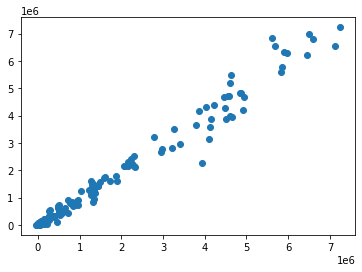

In [265]:
y_pred = rModel2_results.predict(X_test)
plt.scatter(x=y_pred,y= y_test)
plt.title("Regression after one-hot encoding on IT Sectors")

# one hot encoded on States and then the target column dropped

In [296]:
encoded_st = pd.get_dummies(df_de_state['State'])
X_st = df_de_state.join(encoded).drop('State', axis = 1)
print(X_st.shape,encoded_st)

(540, 64)      AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  TN  TX  UT  VA  VI  VT  WA  \
0     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
535   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   1   0   
536   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   
537   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
538   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
539   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

     WI  WV  WY  
0     0   0

In [297]:
X_st= X_st.drop('Emission in metric tons', axis =1)
X_st = sm.add_constant(X_st)

y_st= df_de_state[['Emission in metric tons']]
X_train, X_test, y_train, y_test=train_test_split(X_st, y_st, test_size = 0.25, random_state = 246)

rModel2_st = sm.OLS(y_train, X_train)
rModel2_st_results = rModel2_st.fit()
rModel2_st_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Emission in metric tons   R-squared:                       0.192
Model:                                 OLS   Adj. R-squared:                  0.046
Method:                      Least Squares   F-statistic:                     1.311
Date:                     Mon, 07 Feb 2022   Prob (F-statistic):             0.0701
Time:                             14:54:05   Log-Likelihood:                -5458.3
No. Observations:                      405   AIC:                         1.104e+04
Df Residuals:                          342   BIC:                         1.129e+04
Df Model:                               62                                         
Covariance Type:                 nonrobust                                         
=====================================================================================================================================================================================
                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                              3.799e+07   6.65e+06      5.713      0.000    2.49e+07    5.11e+07
Year                                                                                                              -1.894e+04   3352.103     -5.650      0.000   -2.55e+04   -1.23e+04
Chemicals                                                                                                          6.579e+05   1.26e+05      5.205      0.000    4.09e+05    9.07e+05
Chemicals,Coal-based Liquid Fuel Supply,Suppliers of CO2                                                           6.536e+05   1.27e+05      5.128      0.000    4.03e+05    9.04e+05
Chemicals,Industrial Gas Suppliers                                                                                 5.628e+05   1.33e+05      4.219      0.000       3e+05    8.25e+05
Chemicals,Industrial Gas Suppliers,Minerals                                                                        5.442e+05   1.29e+05      4.230      0.000    2.91e+05    7.97e+05
Chemicals,Industrial Gas Suppliers,Waste                                                                           4.867e+05    1.3e+05      3.748      0.000    2.31e+05    7.42e+05
Chemicals,Other,Petroleum Product Suppliers,Power Plants,Refineries                                                6.342e+05   1.32e+05      4.803      0.000    3.74e+05    8.94e+05
Chemicals,Other,Petroleum and Natural Gas Systems,Waste                                                            6.634e+05    1.3e+05      5.090      0.000    4.07e+05     9.2e+05
Chemicals,Petroleum Product Suppliers                                                                              6.214e+05   1.29e+05      4.823      0.000    3.68e+05    8.75e+05
Chemicals,Petroleum Product Suppliers,Power Plants,Refineries                                                      6.929e+05   1.29e+05      5.378      0.000    4.39e+05    9.46e+05
Chemicals,Petroleum Product Suppliers,Power Plants,Refineries,Suppliers of CO2                                      6.92e+05   1.27e+05      5.459      0.000    4.43e+05    9.41e+05
Chemicals,Petroleum Product Suppliers,Refineries                                                                   5.469e+05   1.26e+05      4.326      0.000    2.98e+05    7.96e+05
Chemicals,Petroleum Product Suppliers,Refineries,Suppliers of CO2                                                  5

Text(0.5, 1.0, 'Regression after one-hot encoding on States')

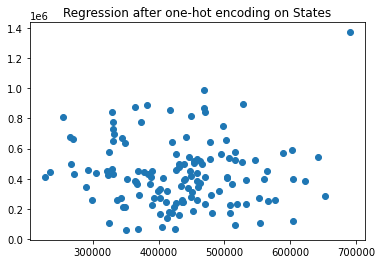

In [269]:
y_pred = rModel2_st_results.predict(X_test)
plt.scatter(x=y_pred,y= y_test)
plt.title("Regression after one-hot encoding on States")

C:\Users\Radhai\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


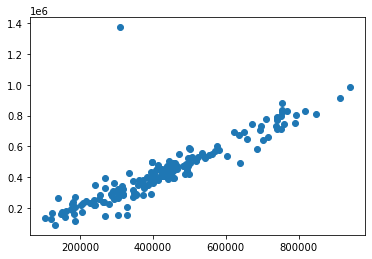

In [334]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# separate into input and output columns
X_st= df_de_state.drop('Emission in metric tons', axis =1)
y_st= df_de_state[['Emission in metric tons']]

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, test_size=0.33, random_state=1)

# one-hot encode input variables
onehot_encoder = OneHotEncoder(drop='first')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)




rModel_onehot_st = linear_model.LinearRegression(normalize=True)
rModel_onehot_st_results = rModel_onehot_st.fit(X_train,y_train)
# evaluate predictions
ypred = rModel_onehot_st.predict(X_test)
plt.scatter(x=ypred,y = y_test)
